# Laboratorio 2:

## Librer√≠as

In [1]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import Tk, filedialog
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Problema #1:

In [2]:
def binarizar_imagen(imagen, metodo, umbral_fijo=None):
    """
    Binariza una imagen usando diferentes m√©todos.
    """
    if metodo == 'otsu':
        _, imagen_binarizada = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    elif metodo == 'media':
        umbral = np.mean(imagen)
        _, imagen_binarizada = cv2.threshold(imagen, umbral, 255, cv2.THRESH_BINARY)
    elif metodo == 'mediana':
        umbral = np.median(imagen)
        _, imagen_binarizada = cv2.threshold(imagen, umbral, 255, cv2.THRESH_BINARY)
    elif metodo == 'fijo':
        if umbral_fijo is None or not (0 <= umbral_fijo <= 255):
            raise ValueError("El valor de umbral fijo debe estar entre 0 y 255.")
        _, imagen_binarizada = cv2.threshold(imagen, umbral_fijo, 255, cv2.THRESH_BINARY)
    else:
        raise ValueError("M√©todo no reconocido.")
    return imagen_binarizada

In [3]:
def mostrar_imagen_binarizada(imagen_original, imagen_binarizada, metodo):
    """
    Muestra la imagen original y la imagen binarizada.
    """
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(imagen_original, cmap='gray')
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')

    axes[1].imshow(imagen_binarizada, cmap='gray')
    axes[1].set_title(f'Imagen Binarizada - M√©todo: {metodo}')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

In [4]:
def binarizar_imagen_interactivo():
    """
    Binariza una imagen despu√©s de preguntar al usuario sobre las caracter√≠sticas de la imagen.
    """
    # Seleccionar la imagen
    root = tk.Tk()
    root.withdraw()
    ruta_imagen = filedialog.askopenfilename(
        title="Seleccione una imagen",
        filetypes=[("Archivos de imagen", "*.jpg *.jpeg *.png *.bmp *.gif")]
    )

    # Verificar si se seleccion√≥ una imagen
    if not ruta_imagen:
        print("No se seleccion√≥ ninguna imagen.")
        return

    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

    if imagen is None:
        print("Error al cargar la imagen. Verifica la ruta.")
        return

    print("Caracter√≠sticas de la imagen:")
    print("1. Contraste alto (objetos bien definidos, fondo oscuro)")
    print("2. Contraste bajo (objetos poco definidos, fondo similar)")
    print("3. Ruido presente (granulado o puntos aleatorios)")
    print("4. Prefiero especificar un umbral fijo")

    while True:
        try:
            opcion = int(input("Selecciona la opci√≥n que mejor describe tu imagen (1-4): "))
            if 1 <= opcion <= 4:
                break
            else:
                print("Opci√≥n inv√°lida. Ingresa un n√∫mero del 1 al 4.")
        except ValueError:
            print("Entrada inv√°lida. Por favor, ingresa un n√∫mero.")

    if opcion == 4:  # M√©todo fijo
        while True:
            try:
                umbral_fijo = int(input("Ingresa el valor de umbral fijo (0-255): "))
                if 0 <= umbral_fijo <= 255:
                    break
                else:
                    print("Valor de umbral inv√°lido. Ingresa un n√∫mero entre 0 y 255.")
            except ValueError:
                print("Entrada inv√°lida. Por favor, ingresa un n√∫mero.")

        metodo = "fijo"
        imagen_binarizada = binarizar_imagen(imagen, metodo, umbral_fijo=umbral_fijo)
    else:
        metodos = ["otsu", "media", "mediana"]
        metodo = metodos[opcion - 1]
        imagen_binarizada = binarizar_imagen(imagen, metodo)

    # Mostrar el m√©todo utilizado en la imagen binarizada
    print(f"M√©todo utilizado: {metodo}")

    mostrar_imagen_binarizada(imagen, imagen_binarizada, metodo)

### Instrucciones

- **Selecciona una Imagen:** Aparecer√° un cuadro de di√°logo para seleccionar la imagen que deseas binarizar.
- **Selecciona el M√©todo de Binarizaci√≥n:** Elige el m√©todo que mejor describe la imagen:
    * 1: Contraste alto (Otsu)
    * 2: Contraste bajo (Media)
    * 3: Ruido presente (Mediana)
    * 4: Especificar umbral fijo
Si seleccionas el m√©todo fijo: Introduce el valor de umbral fijo (0-255).
- **Ver Resultados:** Despu√©s de seleccionar el m√©todo y ajustar el umbral si es necesario, el script mostrar√° la imagen original y la imagen binarizada utilizando el m√©todo elegido.

Caracter√≠sticas de la imagen:
1. Contraste alto (objetos bien definidos, fondo oscuro)
2. Contraste bajo (objetos poco definidos, fondo similar)
3. Ruido presente (granulado o puntos aleatorios)
4. Prefiero especificar un umbral fijo
M√©todo utilizado: otsu


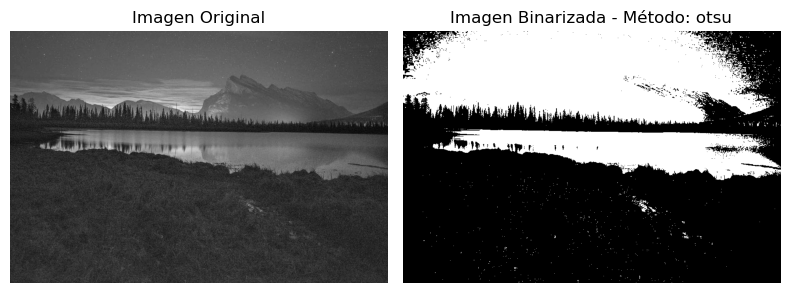

In [5]:
binarizar_imagen_interactivo()

Caracter√≠sticas de la imagen:
1. Contraste alto (objetos bien definidos, fondo oscuro)
2. Contraste bajo (objetos poco definidos, fondo similar)
3. Ruido presente (granulado o puntos aleatorios)
4. Prefiero especificar un umbral fijo
M√©todo utilizado: media


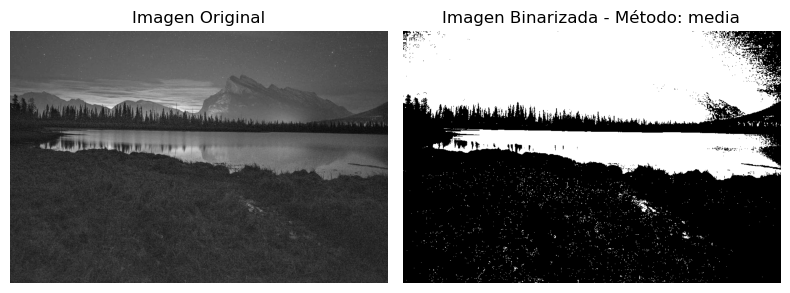

In [6]:
binarizar_imagen_interactivo()

Caracter√≠sticas de la imagen:
1. Contraste alto (objetos bien definidos, fondo oscuro)
2. Contraste bajo (objetos poco definidos, fondo similar)
3. Ruido presente (granulado o puntos aleatorios)
4. Prefiero especificar un umbral fijo
M√©todo utilizado: mediana


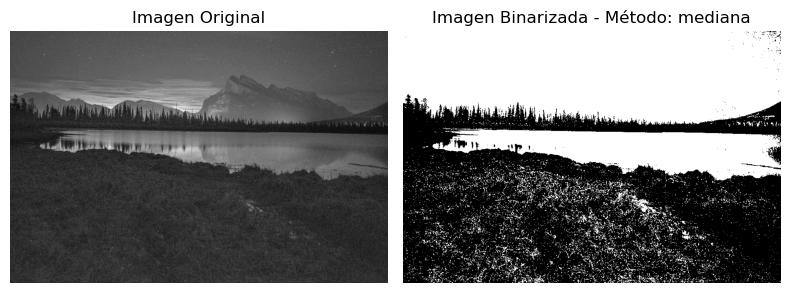

In [7]:
binarizar_imagen_interactivo()

## Problema 2:

In [8]:
def seleccionar_imagen(titulo="Seleccione una imagen"):
    """
    Abre un di√°logo para seleccionar una imagen y la carga.
    """
    Tk().withdraw()  
    ruta_imagen = filedialog.askopenfilename(
        title=titulo,
        filetypes=[("Archivos de imagen", "*.jpg *.jpeg *.png *.bmp *.gif")]
    )
    
    if not ruta_imagen:
        print("No se seleccion√≥ ninguna imagen.")
        return None
    
    imagen = cv2.imread(ruta_imagen)
    
    if imagen is None:
        print("Error al cargar la imagen. Verifica la ruta.")
    
    return imagen

In [9]:
def mostrar_imagenes(imagen1, imagen2, resultado_suma, resultado_resta, resultado_and, resultado_or, resultado_xor):
    """
    Muestra dos im√°genes originales y los resultados de las operaciones aritm√©ticas y l√≥gicas.
    """
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    
    # Imagen 1 Original
    axes[0, 0].imshow(cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Imagen 1 Original')
    axes[0, 0].axis('off')
    
    # Imagen 2 Original
    axes[0, 1].imshow(cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB))
    axes[0, 1].set_title('Imagen 2 Original')
    axes[0, 1].axis('off')
    
    # Resultado de Suma
    axes[0, 2].imshow(resultado_suma, cmap='gray')
    axes[0, 2].set_title('Suma')
    axes[0, 2].axis('off')
    
    # Resultado de Resta
    axes[1, 0].imshow(resultado_resta, cmap='gray')
    axes[1, 0].set_title('Resta')
    axes[1, 0].axis('off')
    
    # Resultado de AND
    axes[1, 1].imshow(resultado_and, cmap='gray')
    axes[1, 1].set_title('AND')
    axes[1, 1].axis('off')
    
    # Resultado de OR
    axes[1, 2].imshow(resultado_or, cmap='gray')
    axes[1, 2].set_title('OR')
    axes[1, 2].axis('off')
    
    # Resultado de XOR
    axes[1, 3].imshow(resultado_xor, cmap='gray')
    axes[1, 3].set_title('XOR')
    axes[1, 3].axis('off')

    # Ocultar ejes vac√≠os en la columna 3
    for ax in axes.flat:
        if not ax.has_data():
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

In [42]:
def obtener_metodo_binarizacion():
    """
    Permite al usuario seleccionar un m√©todo de binarizaci√≥n.
    """
    print("M√©todos de binarizaci√≥n disponibles:")
    print("1. Otsu")
    print("2. Media")
    print("3. Mediana")
    print("4. Fijo")

    while True:
        try:
            opcion = int(input("Selecciona el m√©todo de binarizaci√≥n (1-4): "))
            if opcion in [1, 2, 3, 4]:
                if opcion == 4:
                    while True:
                        try:
                            umbral_fijo = int(input("Ingresa el valor de umbral fijo (0-255): "))
                            if 0 <= umbral_fijo <= 255:
                                return "fijo", umbral_fijo
                            else:
                                print("Valor de umbral inv√°lido. Ingresa un n√∫mero entre 0 y 255.")
                        except ValueError:
                            print("Entrada inv√°lida. Por favor, ingresa un n√∫mero.")
                else:
                    metodos = ["otsu", "media", "mediana"]
                    return metodos[opcion - 1], None
            else:
                print("Opci√≥n inv√°lida. Ingresa un n√∫mero del 1 al 4.")
        except ValueError:
            print("Entrada inv√°lida. Por favor, ingresa un n√∫mero.")

In [11]:
def realizar_operaciones(imagen1, imagen2):
    """
    Realiza operaciones aritm√©ticas y l√≥gicas entre dos im√°genes a color del mismo tama√±o.
    """
    if imagen1.shape != imagen2.shape:
        raise ValueError("Las im√°genes deben tener el mismo tama√±o.")
    
    # Convertir las im√°genes a escala de grises
    imagen1_gray = cv2.cvtColor(imagen1, cv2.COLOR_BGR2GRAY)
    imagen2_gray = cv2.cvtColor(imagen2, cv2.COLOR_BGR2GRAY)
    
    # Obtener el m√©todo de binarizaci√≥n
    metodo, umbral_fijo = obtener_metodo_binarizacion()
    
    # Binarizar las im√°genes
    imagen1_bin = binarizar_imagen(imagen1_gray, metodo, umbral_fijo)
    imagen2_bin = binarizar_imagen(imagen2_gray, metodo, umbral_fijo)
    
    # Realizar operaciones
    resultado_suma = cv2.add(imagen1_bin, imagen2_bin)
    resultado_resta = cv2.subtract(imagen1_bin, imagen2_bin)
    resultado_and = cv2.bitwise_and(imagen1_bin, imagen2_bin)
    resultado_or = cv2.bitwise_or(imagen1_bin, imagen2_bin)
    resultado_xor = cv2.bitwise_xor(imagen1_bin, imagen2_bin)
    
    # Mostrar resultados
    mostrar_imagenes(imagen1, imagen2, resultado_suma, resultado_resta, resultado_and, resultado_or, resultado_xor)

M√©todos de binarizaci√≥n disponibles:
1. Otsu
2. Media
3. Mediana
4. Fijo


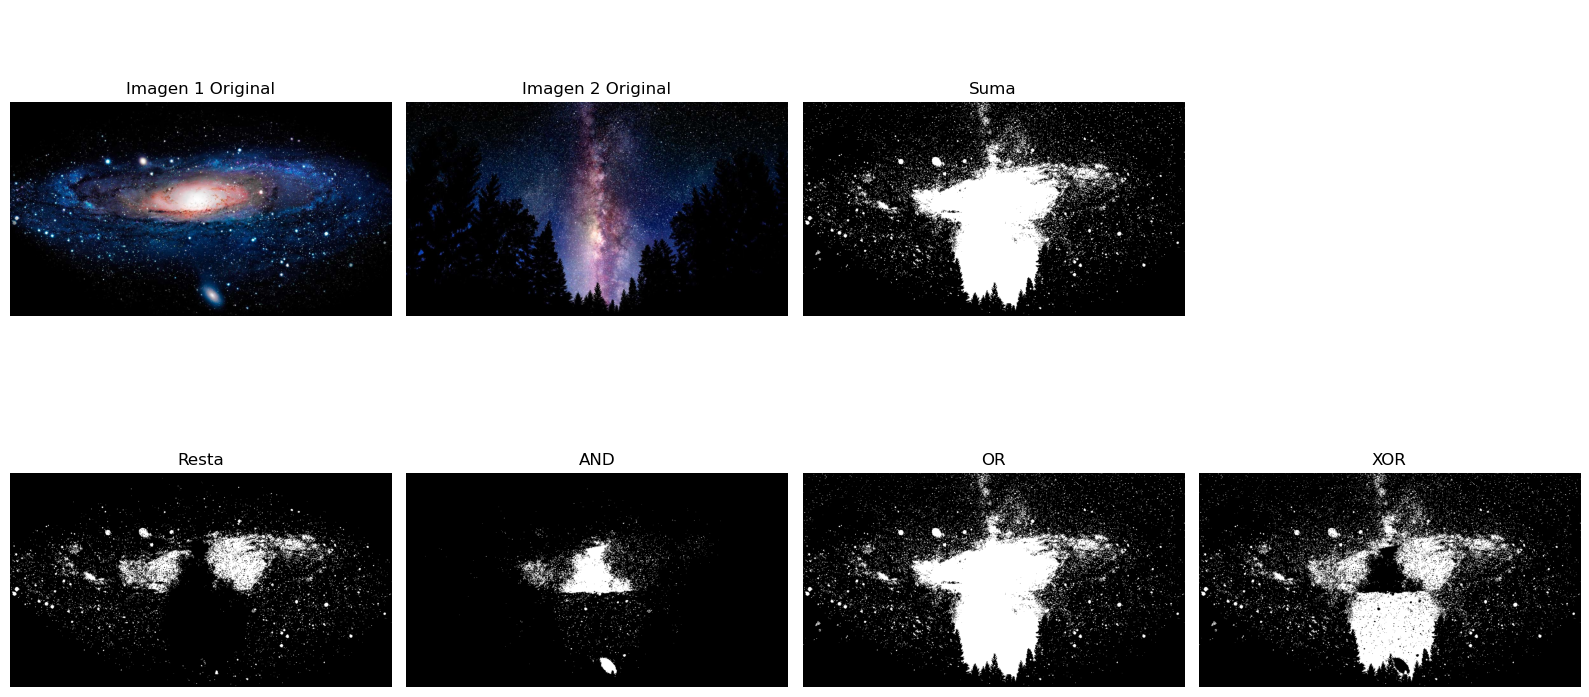

In [12]:
if __name__ == "__main__":
    imagen1 = seleccionar_imagen("Seleccione la primera imagen")
    imagen2 = seleccionar_imagen("Seleccione la segunda imagen")
    
    if imagen1 is not None and imagen2 is not None:
        realizar_operaciones(imagen1, imagen2)

# Problema 3:

In [13]:
def mostrar_imagen_3d(imagen):
    """
    Muestra una imagen en escala de grises en 3 dimensiones.
    Los ejes X e Y representan el dominio espacial de la imagen y el eje Z representa la intensidad del color gris de cada pixel.
    """
    if imagen is None:
        print("La imagen no est√° cargada.")
        return

    # Crear una malla de coordenadas X e Y
    x = np.arange(imagen.shape[1])
    y = np.arange(imagen.shape[0])
    X, Y = np.meshgrid(x, y)

    # Crear la figura y el eje 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Crear el gr√°fico 3D
    ax.plot_surface(X, Y, imagen, cmap='gray')

    # Etiquetas de los ejes
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Intensidad')

    plt.title('Imagen en 3D')
    plt.show()

In [14]:
def seleccionar_imagen():
    """
    Permite al usuario seleccionar una imagen en escala de grises.
    """
    # Crear ventana de selecci√≥n
    root = tk.Tk()
    root.withdraw()
    
    # Seleccionar la imagen
    ruta_imagen = filedialog.askopenfilename(
        title="Seleccione una imagen",
        filetypes=[("Archivos de imagen", "*.jpg *.jpeg *.png *.bmp")]
    )
    
    if not ruta_imagen:
        print("No se seleccion√≥ ninguna imagen.")
        return None
    
    # Leer y convertir la imagen a escala de grises
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    if imagen is None:
        print("Error al cargar la imagen.")
        return None
    
    return imagen

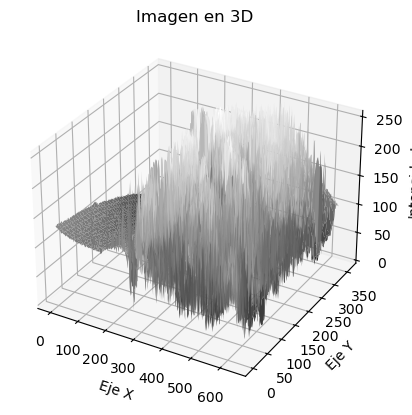

In [15]:
# Seleccionar imagen
imagen = seleccionar_imagen()

# Mostrar imagen en 3D
if imagen is not None:
    mostrar_imagen_3d(imagen)

## Problema 4

### Primera forma - funci√≥n por funci√≥n

#### Negativa

La transformaci√≥n negativa invierte los valores de los p√≠xeles. 

In [16]:
def transformar_negativo(imagen):
    """
    Aplica una transformaci√≥n negativa a la imagen en escala de grises.
    """
    if imagen is None:
        print("La imagen no est√° cargada.")
        return None
    
    return 255 - imagen

#### Lineal

La transformaci√≥n lineal ajusta el contraste de la imagen. Se puede definir como imagen_transf = ùëé‚ãÖimagen + ùëè imagen_transf=a‚ãÖimagen+b, donde ùëé y ùëè son par√°metros ajustables.

In [17]:
def transformar_lineal(imagen, a=1.0, b=0.0):
    """
    Aplica una transformaci√≥n lineal a la imagen en escala de grises.
    """
    if imagen is None:
        print("La imagen no est√° cargada.")
        return None
    
    # Aplicar la transformaci√≥n lineal
    imagen_transf = a * imagen + b
    # Asegurar que los valores est√©n en el rango [0, 255]
    imagen_transf = np.clip(imagen_transf, 0, 255).astype(np.uint8)
    
    return imagen_transf


#### Logar√≠tmica

La transformaci√≥n logar√≠tmica resalta los valores bajos de intensidad. Se define como imagen_transf = ùëê‚ãÖlog(1 + imagen) imagen_transf=c‚ãÖlog(1+imagen), donde ùëê es un par√°metro de escala.

In [18]:
def transformar_logaritmica(imagen, c=255):
    """
    Aplica una transformaci√≥n logar√≠tmica a la imagen en escala de grises.
    """
    if imagen is None:
        print("La imagen no est√° cargada.")
        return None
    
    # Aplicar la transformaci√≥n logar√≠tmica
    imagen_transf = c * np.log1p(imagen)
    # Asegurar que los valores est√©n en el rango [0, 255]
    imagen_transf = np.clip(imagen_transf, 0, 255).astype(np.uint8)
    
    return imagen_transf

#### Exponencial

La transformaci√≥n exponencial resalta los valores altos de intensidad. Se define como imagen_transf = ùëê‚ãÖ(ùëí^(imagen/ùëè) ‚àí 1), donde ùëê y ùëè son par√°metros de escala.

In [19]:
def transformar_exponencial(imagen, c=255, b=1.0):
    """
    Aplica una transformaci√≥n exponencial a la imagen en escala de grises.
    """
    if imagen is None:
        print("La imagen no est√° cargada.")
        return None
    
    # Aplicar la transformaci√≥n exponencial
    imagen_transf = c * (np.exp(imagen / b) - 1)
    # Asegurar que los valores est√©n en el rango [0, 255]
    imagen_transf = np.clip(imagen_transf, 0, 255).astype(np.uint8)
    
    return imagen_transf


#### Mostrar im√°genes

In [26]:
def mostrar_imagen_transformada(imagen_original, imagen_transformada, metodo):
    """
    Muestra la imagen original y la imagen transformada.
    """
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    
    axes[0].imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB), cmap='gray')
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')
    
    axes[1].imshow(imagen_transformada, cmap='gray')
    axes[1].set_title(f'Imagen {metodo.capitalize()}')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

In [24]:
def aplicar_transformacion_interactiva(imagen):
    """
    Permite al usuario seleccionar y aplicar una transformaci√≥n a la imagen en escala de grises.
    """
    if imagen is None:
        print("La imagen no est√° cargada.")
        return
    
    print("Selecciona la transformaci√≥n que deseas aplicar:")
    print("1. Negativa")
    print("2. Lineal")
    print("3. Logar√≠tmica")
    print("4. Exponencial")

    while True:
        try:
            opcion = int(input("Selecciona la opci√≥n (1-4): "))
            if 1 <= opcion <= 4:
                break
            else:
                print("Opci√≥n inv√°lida. Ingresa un n√∫mero del 1 al 4.")
        except ValueError:
            print("Entrada inv√°lida. Por favor, ingresa un n√∫mero.")
    
    if opcion == 1:
        imagen_transf = transformar_negativo(imagen)
        metodo = "Negativa"
    elif opcion == 2:
        a = float(input("Ingresa el valor de 'a' (escala): "))
        b = float(input("Ingresa el valor de 'b' (desplazamiento): "))
        imagen_transf = transformar_lineal(imagen, a, b)
        metodo = "Lineal"
    elif opcion == 3:
        c = float(input("Ingresa el valor de 'c' (escala): "))
        imagen_transf = transformar_logaritmica(imagen, c)
        metodo = "Logar√≠tmica"
    elif opcion == 4:
        c = float(input("Ingresa el valor de 'c' (escala): "))
        b = float(input("Ingresa el valor de 'b' (escalar): "))
        imagen_transf = transformar_exponencial(imagen, c, b)
        metodo = "Exponencial"
    
    if imagen_transf is not None:
        mostrar_imagen_transformada(imagen, imagen_transf, metodo)

#### Uso

##### Instrucciones

1. **Seleccionar la Imagen:**
   Usa la funci√≥n `seleccionar_imagen()` para abrir un di√°logo de selecci√≥n de archivos y elegir la imagen que deseas procesar.
2. **Aplicar Transformaciones Interactivas:**
   Una vez que hayas seleccionado la imagen, llama a la funci√≥n `aplicar_transformacion_interactiva(imagen)` para iniciar el proceso interactivo de aplicaci√≥n de transformaciones.
La funci√≥n `aplicar_transformacion_interactiva` te pedir√° que elijas entre diferentes tipos de transformaciones y te permitir√° ingresar los par√°metros necesarios para cada una. Aqu√≠ est√°n los detalles:

1. **Transformaci√≥n Negativa**
   - **Descripci√≥n:** Invertir los valores de los p√≠xeles de la imagen.
   - **Par√°metros:** No se requieren par√°metros adicionales.

2. **Transformaci√≥n Lineal**
   - **Descripci√≥n:** Ajusta la intensidad de los p√≠xeles mediante una transformaci√≥n lineal.
   - **Par√°metros:**
     - **`a` (pendiente):** 1.0 a 1.5 (Aumenta el contraste. Valores m√°s altos aumentan el contraste).
     - **`b` (intersecci√≥n):** 0 a 50 (Desplaza los valores de los p√≠xeles a lo largo del eje de intensidad).

3. **Transformaci√≥n Logar√≠tmica**
   - **Descripci√≥n:** Comprime los valores de los p√≠xeles, haciendo que los detalles oscuros sean m√°s visibles.
   - **Par√°metros:**
     - **`c` (constante de escala):** 1 a 5 (Aumenta la visibilidad de los detalles oscuros. Valores m√°s altos aumentan el efecto).

4. **Transformaci√≥n Exponencial**
   - **Descripci√≥n:** Aumenta el contraste en √°reas oscuras y expande las √°reas claras.
   - **Par√°metros:**
     - **`c` (constante de escala):** 1 a 5 (Aumenta el contraste en las √°reas oscuras).
     - **`b` (base de la exponencial):** 1.1 a 1.5 (Controla la intensidad del efecto exponencial. Evita valores demasiado altos para evitar que la imagen se vuelva blanca).

Selecciona la transformaci√≥n que deseas aplicar:
1. Negativa
2. Lineal
3. Logar√≠tmica
4. Exponencial


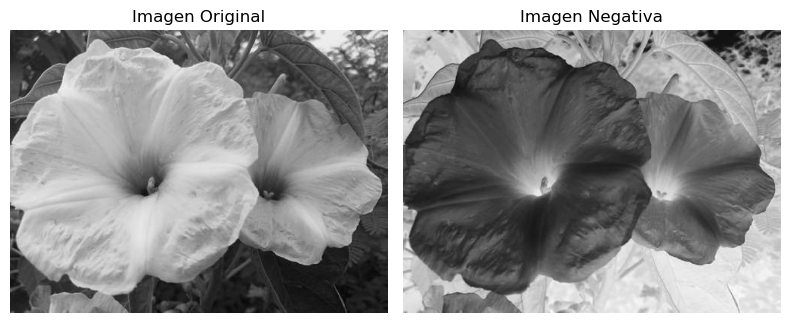

In [27]:
# Seleccionar imagen
imagen = seleccionar_imagen()

# Aplicar transformaci√≥n interactiva
if imagen is not None:
    aplicar_transformacion_interactiva(imagen)

Selecciona la transformaci√≥n que deseas aplicar:
1. Negativa
2. Lineal
3. Logar√≠tmica
4. Exponencial


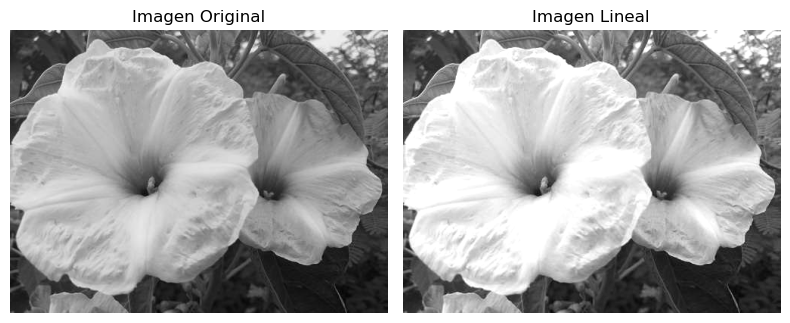

In [33]:
imagen = seleccionar_imagen()

# Aplicar transformaci√≥n interactiva
if imagen is not None:
    aplicar_transformacion_interactiva(imagen)

Selecciona la transformaci√≥n que deseas aplicar:
1. Negativa
2. Lineal
3. Logar√≠tmica
4. Exponencial


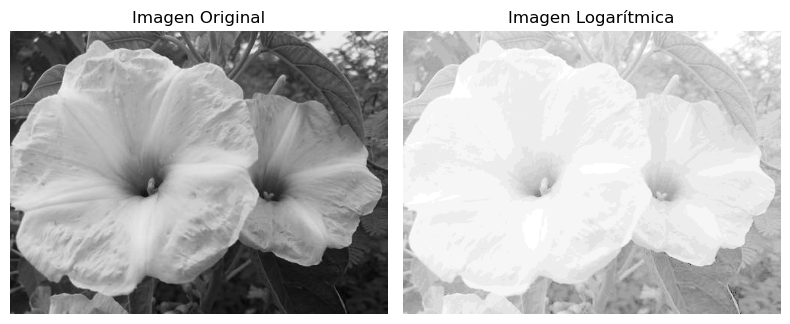

In [34]:
imagen = seleccionar_imagen()

# Aplicar transformaci√≥n interactiva
if imagen is not None:
    aplicar_transformacion_interactiva(imagen)

Selecciona la transformaci√≥n que deseas aplicar:
1. Negativa
2. Lineal
3. Logar√≠tmica
4. Exponencial


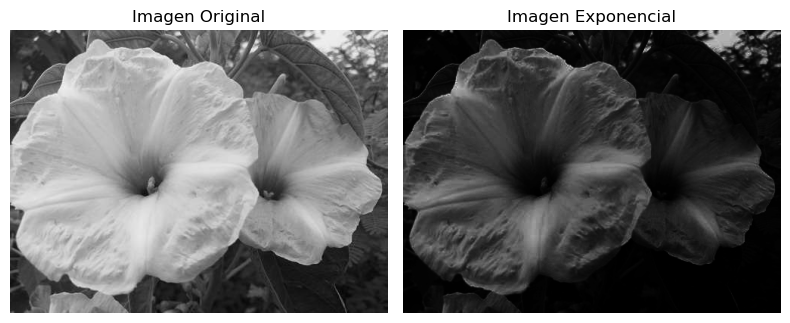

In [41]:
imagen = seleccionar_imagen()

# Aplicar transformaci√≥n interactiva
if imagen is not None:
    aplicar_transformacion_interactiva(imagen)

## Problema 5:

## Kernel Laplaceano

### Definici√≥n

El kernel Laplaceano es un operador de detecci√≥n de bordes que utiliza el segundo derivado de la imagen para identificar √°reas de alta curvatura, que suelen corresponder a los bordes. El operador Laplaceano se basa en el Laplaciano, una medida de la tasa de cambio en la intensidad de los p√≠xeles en la imagen.


### Aplicaci√≥n

El kernel Laplaceano se aplica a una imagen utilizando un filtro, que calcula el Laplaciano de la imagen. Se utiliza t√≠picamente para detectar bordes en im√°genes. 

### Ventajas

- **Detecci√≥n de Bordes en Varias Direcciones:** Detecta bordes en todas las direcciones debido a su naturaleza isotr√≥pica.
- **Simplicidad:** El c√°lculo es relativamente simple y directo.

### Desventajas

- **Ruido:** Sensible al ruido en la imagen, lo que puede llevar a la detecci√≥n de bordes falsos.
- **No es Robusto a Cambios de Iluminaci√≥n:** Puede ser menos efectivo en im√°genes con variaciones de iluminaci√≥n.

### C√≥digo

A continuaci√≥n se muestra un ejemplo de c√≥mo aplicar el kernel Laplaceano usando OpenCV en Python:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def aplicar_laplaceano(imagen):
    """
    Aplica el filtro Laplaceano a una imagen en escala de grises.
    """
    laplacian = cv2.Laplacian(imagen, cv2.CV_64F)
    return cv2.convertScaleAbs(laplacian)

# Cargar imagen
imagen = cv2.imread('ruta_de_la_imagen.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar el filtro Laplaceano
imagen_laplaceano = aplicar_laplaceano(imagen)

# Mostrar resultados
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(imagen, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Imagen con Laplaceano')
plt.imshow(imagen_laplaceano, cmap='gray')

plt.show()
```

### Ejemplo

En una imagen de prueba, el filtro Laplaceano realza los bordes de las figuras en la imagen, mostrando claramente los contornos definidos de objetos.

## Algoritmo de Canny

### Definici√≥n

El algoritmo de Canny es un m√©todo de detecci√≥n de bordes m√°s avanzado y robusto que utiliza una serie de pasos para detectar bordes en una imagen. Incluye suavizado, detecci√≥n de gradientes, supresi√≥n de no m√°ximos y umbralizaci√≥n.


### Aplicaci√≥n

El algoritmo de Canny se aplica en varias etapas para detectar bordes de manera precisa y continua en im√°genes. Los pasos incluyen:

1. **Suavizado:** Aplicar un filtro Gaussiano para reducir el ruido.
2. **Detecci√≥n de Gradientes:** Calcular la magnitud y direcci√≥n del gradiente de la imagen.
3. **Supresi√≥n de No M√°ximos:** Refinar la detecci√≥n de bordes eliminando p√≠xeles que no son bordes locales m√°ximos.
4. **Umbralizaci√≥n Hister√©tica:** Aplicar dos umbrales para encontrar bordes fuertes y d√©biles y conectar los bordes.

### Ventajas

- **Robustez al Ruido:** Menos sensible al ruido en comparaci√≥n con el Laplaceano.
- **Bordes Continuos:** Proporciona bordes continuos y delgados.
- **Control de Umbrales:** Permite ajustar los umbrales para mejorar la precisi√≥n.

### Desventajas

- **Computacionalmente Costoso:** M√°s complejo y requiere m√°s tiempo de procesamiento.
- **Configuraci√≥n de Par√°metros:** Puede requerir ajustes finos en los par√°metros de umbralizaci√≥n.

### C√≥digo

A continuaci√≥n se muestra un ejemplo de c√≥mo aplicar el algoritmo de Canny usando OpenCV en Python:

```python
import cv2
import matplotlib.pyplot as plt

def aplicar_canny(imagen, umbral1, umbral2):
    """
    Aplica el algoritmo de Canny a una imagen en escala de grises.
    """
    return cv2.Canny(imagen, umbral1, umbral2)

# Cargar imagen
imagen = cv2.imread('ruta_de_la_imagen.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar el algoritmo de Canny
imagen_canny = aplicar_canny(imagen, 100, 200)

# Mostrar resultados
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(imagen, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Imagen con Canny')
plt.imshow(imagen_canny, cmap='gray')

plt.show()
```

### Ejemplo

En una imagen de prueba, el algoritmo de Canny detecta bordes precisos y continuos, siendo m√°s efectivo en im√°genes con ruido y variaciones en la iluminaci√≥n.

## Cuadro Comparativo: Kernel Laplaceano vs. Algoritmo de Canny


| **Caracter√≠stica**          | **Kernel Laplaceano**                                     | **Algoritmo Canny**                                      |
|-----------------------------|-----------------------------------------------------------|----------------------------------------------------------|
| **Objetivo**                | Detectar bordes y realzar caracter√≠sticas lineales en im√°genes. | Detectar bordes con alta precisi√≥n y reducir la cantidad de bordes falsos. |
| **M√©todo**                  | Emplea el operador Laplaciano, que calcula la segunda derivada de la imagen, detectando cambios r√°pidos en la intensidad. | Combina m√∫ltiples etapas: suavizado, detecci√≥n de gradientes, supresi√≥n de no-m√°ximos y umbralizaci√≥n por histeresis para una detecci√≥n precisa de bordes. |
| **Suavizado**               | Generalmente se aplica un filtro Gaussiano antes de aplicar el operador Laplaciano para reducir el ruido. | Utiliza un filtro Gaussiano para suavizar la imagen, eliminando el ruido antes de la detecci√≥n de bordes. |
| **Detecci√≥n de bordes**     | Identifica bordes buscando cruces por cero en la respuesta del Laplaciano, resaltando las transiciones de intensidad. | Detecta bordes utilizando la magnitud y direcci√≥n del gradiente, con un enfoque m√°s estructurado para identificar bordes reales. |
| **Supresi√≥n de no-m√°ximos** | No se aplica.                                           | Se realiza para eliminar p√≠xeles que no son m√°ximos locales en la direcci√≥n del gradiente, refinando la imagen de bordes. |
| **Histeresis**              | No se utiliza.                                          | Implementa un umbral alto y bajo para distinguir entre bordes fuertes y d√©biles, mejorando la precisi√≥n de los bordes detectados. |
| **Resultado final**         | Produce una imagen donde los bordes est√°n resaltados, pero puede incluir ruido y bordes falsos. | Genera una imagen binaria clara que destaca los bordes verdaderos y elimina bordes no deseados mediante un umbral y supresi√≥n de no-m√°ximos. |


## Referencias

- OpenCV Documentation: [OpenCV](https://docs.opencv.org)
- "Computer Vision: Algorithms and Applications" by Richard Szeliski.
- "Digital Image Processing" by Rafael C. Gonzalez and Richard E. Woods.
